<a href="https://colab.research.google.com/github/silvia-j-escobar/ExternDataScience/blob/main/Learn_How_to_Use_EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learn How to Use EasyOCR

In the last module, you explored how PaddleOCR helps us extract text and layout from complex mortgage documents. But what if you want something faster, simpler, and lighter?
That’s where EasyOCR comes in.
While it’s not as deep or structured as PaddleOCR, EasyOCR is perfect for quick wins—especially when working with scanned forms, ID-style layouts, or smaller batches of documents.
Let’s try it out using the same mortgage PDF from earlier. You’ll load the file, extract text, and draw boxes around everything EasyOCR finds—so you can see exactly what’s working (and what’s not).
What You’ll Need
Sample PDF: Mortgage Worksheet PDF
Notebook: Colab Demo – EasyOCR Version
PDF contains real-world features like: tables, columns, and form-style fields

In [11]:
# 1: Install EasyOCR and Some Helpers
!pip install easyocr
!pip install pdf2image
!apt-get install poppler-utils -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.12).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


Saving LenderFeesWorksheetNew (1).pdf to LenderFeesWorksheetNew (1) (1).pdf


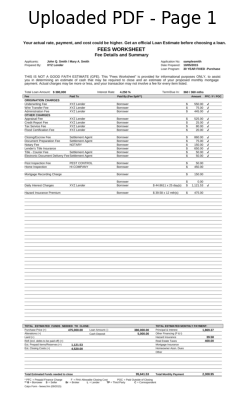

In [12]:
# 2: Upload and convert PDF
from google.colab import files
from pdf2image import convert_from_path
from PIL import Image
import matplotlib.pyplot as plt

# Upload your file
uploaded = files.upload()
pdf_path = f"/content/{list(uploaded.keys())[0]}"

# Convert first page to image
images = convert_from_path(pdf_path, dpi=300)
image = images[0]
image_path = '/content/page.png'
image.save(image_path)

# Show preview
plt.imshow(image)
plt.axis('off')
plt.title("Uploaded PDF - Page 1")
plt.show()

In [14]:
# 3: Run EasyOCR and visualize results
import easyocr
from PIL import ImageDraw

# Initialize reader
reader = easyocr.Reader(['en'])

# Run OCR
result = reader.readtext(image_path)

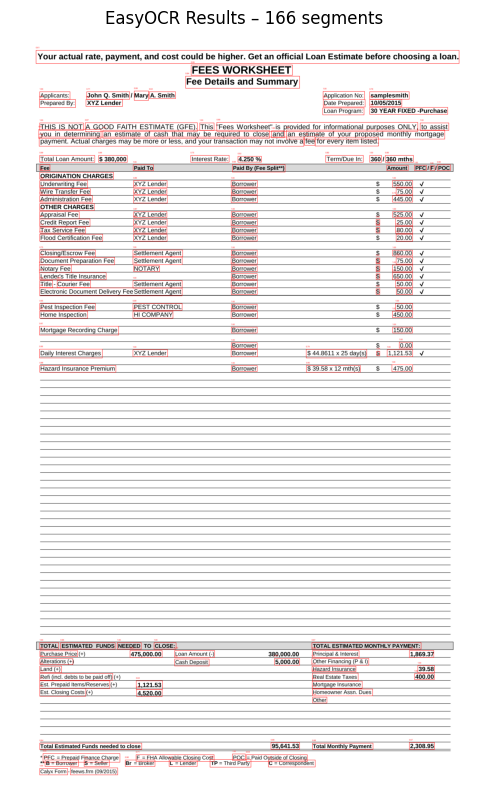

In [15]:
# Let’s visualize what EasyOCR found:
# Visualize
img_copy = image.copy()
draw = ImageDraw.Draw(img_copy)
extracted_text = []

for (bbox, text, confidence) in result:
    if confidence > 0.5:
        # Bounding box
        top_left = tuple(map(int, bbox[0]))
        bottom_right = tuple(map(int, bbox[2]))
        draw.rectangle([top_left, bottom_right], outline='red', width=2)

        # Confidence score
        draw.text((top_left[0], top_left[1] - 20), f"{confidence:.2f}", fill='red')

        extracted_text.append(text)

plt.figure(figsize=(15, 10))
plt.imshow(img_copy)
plt.axis('off')
plt.title(f"EasyOCR Results – {len(extracted_text)} segments")
plt.show()

In [16]:
# 4. Print Extracted Text
print(f"\n📝 Extracted Text ({len(extracted_text)} segments):")
for i, text in enumerate(extracted_text, 1):
    print(f"{i:2d}. {text}")



📝 Extracted Text (166 segments):
 1. Your actual rate, payment; and cost could be higher. Get an official Loan Estimate before choosing a loan.
 2. FEES WORKSHEET
 3. Fee Details and Summary
 4. Applicants:
 5. John Q. Smith
 6. A. Smith
 7. Application No:
 8. samplesmith
 9. Prepared By:
10. XYZ Lender
11. Date Prepared:
12. 10/05/2015
13. Loan Program:
14. 30 YEAR FIXED -Purchase
15. THIS IS NOT
16. A GOOD FAITH ESTIMATE (GFE):
17. This
18. "Fees Worksheet" is provided for informational purposes ONLY,
19. to assist
20. you in determining
21. an estimate of cash that may be required to close
22. and
23. an estimate of your proposed monthly mortgage
24. payment: Actual charges may be more or less, and your transaction may not involve a
25. for every item listed:
26. Total Loan Amount:
27. $ 380,000
28. Interest Rate:
29. 4.250 %
30. TermlDue In:
31. 360
32. 360 mths
33. Fee
34. Paid To
35. Paid By (Fee_Splittt)
36. Amount
37. PFC
38. F
39. POC
40. ORIGINATION CHARGES
41. Underwriting

🧠
Want to go deeper?
Here are a few mini challenges you can try right after this:
Try running OCR on page 2 or 3 of the mortgage PDF
Zoom into a tricky section (like the fee table) — how well does it read the numbers?
Compare this to your earlier Tesseract output — where does EasyOCR do better?
We’ll explore all of this more in the next module — including how to make sense of these differences and when to use what.


EasyOCR gave us a quick, no-fuss way to read forms and extract key fields. But how do we decide when to use EasyOCR vs PaddleOCR? What makes one tool “better” than the other?
Up next, we’ll talk about how to compare OCR engines in the real world—especially when your documents aren’t perfect

Quick Recap
Why Use EasyOCR
It’s lightweight, easy to install, and perfect for scanned forms or small batches.
Doesn’t require a deep setup like PaddleOCR—great for fast results.
How It Works
Converts a PDF page into an image, then reads the text using EasyOCR.
Draws boxes and confidence scores so you can visually verify what it captured.
When It Shines
Works well on structured forms, IDs, and documents with clean layouts.
Faster setup, but less layout-aware than PaddleOCR.
